# Лабораторная работа №1: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 2383 Шмонова Наталья Александровна и Сериков Магжан. Вариант №11.

## Цель работы

Изучить математическое описание стандартных дискретных сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

### Дискретное время
- **Дискретное время** формируется выборкой непрерывного времени с шагом дискретизации:
  $$
  t = nT, \quad n = 0,1,2,\dots,(N-1)
  $$
  где:  
  - $T$ — период дискретизации (шаг по времени),  
  - $f_s = \frac{1}{T}$ — частота дискретизации,  
  - $n$ — нормированное (дискретное) время.

---

### Единичный цифровой импульс:
- **Определение**:
$$
\delta_d(k) =
\begin{cases}
1, & k = 0, \\
0, & k \neq 0.
\end{cases}, \quad k = ..., -2, -1, 0, 1, 2, ...
$$

Является дискретным аналогом дельта-функции (функции Дирака).

$$
\delta(t) =
\begin{cases}
\infty, & t = 0, \\
0, & t \neq 0.
\end{cases}, \quad \int_{-\infty}^{\infty} \delta(t) dt = 1
$$

---

### Дискретный единичный скачок
- **Определение**:
  $$
  \sigma_d(k) =
  \begin{cases}
  1, & k \geq 0 \\
  0, & k < 0
  \end{cases}, \quad k = ..., -2, -1, 0, 1, 2, ...
  $$
Является дискретным аналогом функции единичного скачка (функция Хэвисайда)
$$
\delta(t) =
\begin{cases}
1, & t > 0 \\
0.5 \, \text{или неопределена}, & t = 0 \\
0, & t < 0
\end{cases}
$$

---

### Дискретная экспоненциальная функция
- **Определение**:
$$s(k) =
\begin{cases}
0, & k < 0, \\
a^k, & k \geq 0.
\end{cases}, \, k = \ldots, -2, -1, 0, 1, 2, \ldots$$

---

### Дискретный комплексный гармонический сигнал
- **Определение**:
  $$
  s_2(n) = C e^{j \omega_0 n}, \quad n \geq 0
  $$
  где:
  - $C$ — амплитуда (комплексная константа),  
  - $\omega_0$ — цифровая круговая частота.  

- Разложение на вещественную и мнимую части:
  $$
  s_2(n) = C \cos(\omega_0 n) + j C \sin(\omega_0 n)
  $$

---

## Задержка последовательностей
Для сигнала $x(n)$ задержка на $m$ отсчётов записывается так:
$x(n-m)$

**Примеры:**

- Задержанный импульс:
$$
\delta_d(n-m) =
\begin{cases}
1, & n = m \\
0, & n \neq m
\end{cases}
$$

- Задержанный скачок:
$$
\sigma_d(n-m) =
\begin{cases}
1, & n \geq m \\
0, & n < m
\end{cases}
$$

- Задержанная экспонента:
$$
s_1(n-m) = a^{(n-m)}, \quad n \geq m
$$


## Постановка задачи

С помощью программных средств провести моделирование и анализ стандартных дискретных последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Nb = 11

N = 30 + Nb % 5   # Длина последовательности
T = 0.0005 * (1 + Nb % 3) # Период дискретизации
a = (-1)**Nb * (0.8 + 0.005 * (Nb % 20)) # Основание экспоненты
C = 1 + Nb % 5    # Амплитуда гармонического сигнала
w0 = np.pi / (6 + Nb % 5) # Частота гармонического сигнала
m = 5 + Nb % 5    # Задержка

# Вывод рассчитанных параметров
print(f"Рассчитанные параметры:")
print(f"N = {N}")
print(f"T = {T} с")
print(f"a = {a}")
print(f"C = {C}")
print(f"ω₀ = {w0:.4f}")
print(f"m = {m}")

Рассчитанные параметры:
N = 31
T = 0.0015 с
a = -0.8550000000000001
C = 2
ω₀ = 0.4488
m = 6


## Задание 1

1. Смоделировать единичный цифровой импульс $\delta_d(k)$ с выводом графиков на интервале дискретного времени $nT \in [0, (N - 1)T]$ и дискретного нормированного времени $n \in [0, N - 1]$. Пояснить:

a. взаимосвязь между дискретным и дискретным нормированным временем;

b. различие между единичным цифровым импульсом и дельта-функцией.

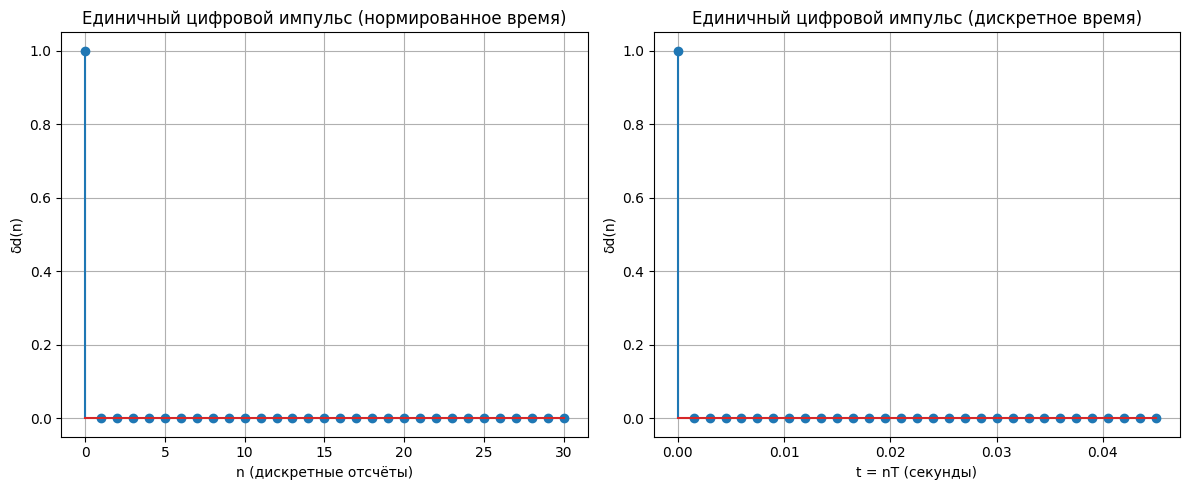

In [ ]:
# Индексы дискретного времени
n = np.arange(N)       # нормированное дискретное время [0, N-1]
t = n * T              # реальное дискретное время [0, (N-1)T]

# Единичный цифровой импульс
delta_d = np.zeros(N)
delta_d[0] = 1  # импульс только в начале

# Построение графиков
plt.figure(figsize=(12,5))

# 1. Нормированное время
plt.subplot(1,2,1)
plt.stem(n, delta_d)
plt.title("Единичный цифровой импульс (нормированное время)")
plt.xlabel("n (дискретные отсчёты)")
plt.ylabel("δd(n)")
plt.grid(True)

# 2. Реальное дискретное время
plt.subplot(1,2,2)
plt.stem(t, delta_d)
plt.title("Единичный цифровой импульс (дискретное время)")
plt.xlabel("t = nT (секунды)")
plt.ylabel("δd(n)")
plt.grid(True)

plt.tight_layout()
plt.show()

#### a. Взаимосвязь между дискретным и дискретным нормированным временем
- **Нормированное дискретное время** задаётся индексами отсчётов:
  $$
  n = 0, 1, 2, \dots, N-1
  $$
- **Реальное дискретное время** выражается через шаг дискретизации $T$:
  $$
  t = nT, \quad n = 0,1,2,\dots,(N-1)
  $$
Таким образом, нормированное время $n$ показывает **номер отсчёта**, а реальное время $t$ показывает **момент времени** в секундах, соответствующий этому отсчёту.

#### b. Различие между единичным цифровым импульсом и дельта-функцией
  - **Единичный цифровой импульс**:
  $$
  \delta_d(k) =
  \begin{cases}
  1, & k = 0, \\
  0, & k \neq 0.
  \end{cases}, \quad k = ..., -2, -1, 0, 1, 2, ...
  $$
  Это дискретная последовательность, равная 1 в нулевом отсчёте и 0 во всех остальных. Используется для дискретных сигналов.

- **Дельта-функция Дирака (непрерывная)**:
  $$
  \delta(t) =
  \begin{cases}
  \infty, & t = 0, \\
  0, & t \neq 0.
  \end{cases}, \quad \int_{-\infty}^{\infty} \delta(t) dt = 1
  $$
  Это обобщённая функция, у которой значение бесконечно в точке $t=0$, но интеграл равен 1. Используется для непрерывных сигналов.


## Задание 2

2. Смоделировать дискретный единичный скачок $\sigma_d(k)$ с выводом графиков на интервале дискретного времени $nT \in [0, (N - 1)T]$ и дискретного нормированного времени $n \in [0, N - 1]$. Пояснить:  
   a. соответствие между дискретным и аналоговым единичными скачками;  
   b. чему равна частота дискретизации дискретного единичного скачка.

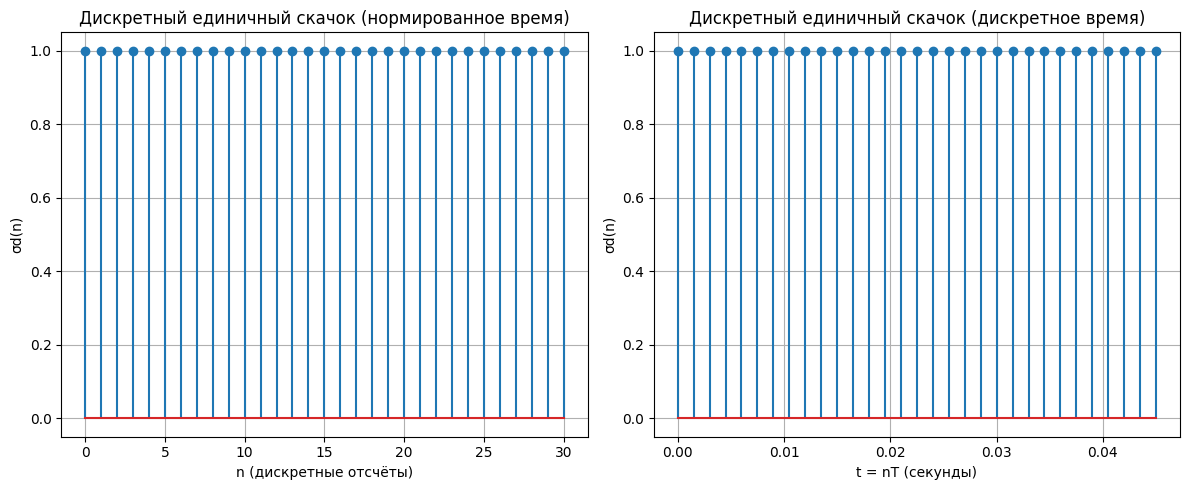

Частота дискретизации f_s = 666.67 Гц


In [ ]:
# Дискретный единичный скачок
sigma_d = np.ones(N)  # все значения равны 1
sigma_d[0] = 1        # начиная с 0 включительно

# Построение графиков
plt.figure(figsize=(12,5))

# 1. Нормированное время
plt.subplot(1,2,1)
plt.stem(n, sigma_d)
plt.title("Дискретный единичный скачок (нормированное время)")
plt.xlabel("n (дискретные отсчёты)")
plt.ylabel("σd(n)")
plt.grid(True)

# 2. Реальное дискретное время
plt.subplot(1,2,2)
plt.stem(t, sigma_d)
plt.title("Дискретный единичный скачок (дискретное время)")
plt.xlabel("t = nT (секунды)")
plt.ylabel("σd(n)")
plt.grid(True)

plt.tight_layout()
plt.show()

# Частота дискретизации
fs = 1 / T
print(f"Частота дискретизации f_s = {fs:.2f} Гц")


#### a. Соответствие между дискретным и аналоговым единичными скачками
  - **Аналоговый единичный скачок (функция Хевисайда):**
  $$
  \delta(t) =
  \begin{cases}
  1, & t > 0 \\
  0.5 \, \text{или неопределена}, & t = 0 \\
  0, & t < 0
  \end{cases}
  $$

- **Дискретный единичный скачок:**
  $$
  \sigma_d(k) =
  \begin{cases}
  1, & k \geq 0 \\
  0, & k < 0
  \end{cases}, \quad k = ..., -2, -1, 0, 1, 2, ...
  $$

Таким образом, $\sigma_d(k)$ представляет собой дискретизированный вариант $\delta(t)$:  
он показывает, что начиная с момента $t=0$ последовательность остаётся равной 1.

---

#### b. Частота дискретизации дискретного единичного скачка
- Дискретный скачок $\sigma_d(k)$ определяется на дискретных моментах времени:
  $$
  t = kT, \quad k = 0,1,2,\dots,(N-1)
  $$
- Частота дискретизации равна:
  $$
  f_s = \frac{1}{T} = \frac{1}{0.0015} = 666.67 \quad Гц.
  $$
- Она зависит только от выбранного шага дискретизации $T$, но сама форма скачка (0 до $k=0$, далее 1) при этом не меняется.


## Задание 3

3. Смоделировать дискретную экспоненциальную функцию $s_1(k)$ с выводом графиков на интервале дискретного времени $nT \in [0, (N - 1)T]$ и дискретного нормированного времени $n \in [0, N - 1]$. Пояснить соответствие между дискретной и аналоговой экспонентами.

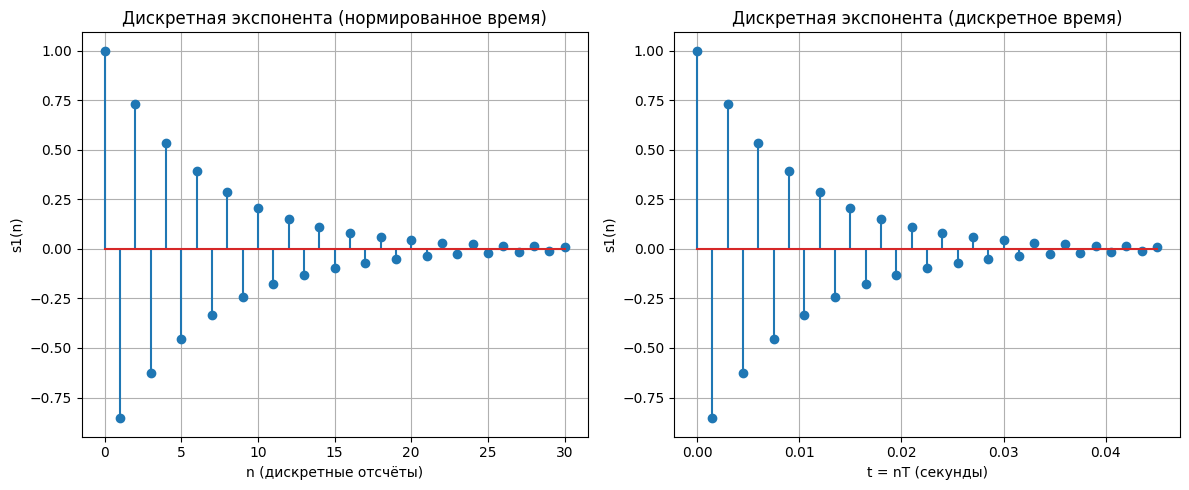

In [ ]:
# Дискретная экспоненциальная функция
s1 = a ** n   # дискретная экспонента

plt.figure(figsize=(12,5))

# 1. Нормированное время
plt.subplot(1,2,1)
plt.stem(n, s1)
plt.title("Дискретная экспонента (нормированное время)")
plt.xlabel("n (дискретные отсчёты)")
plt.ylabel("s1(n)")
plt.grid(True)

# 2. Реальное дискретное время
plt.subplot(1,2,2)
plt.stem(t, s1)
plt.title("Дискретная экспонента (дискретное время)")
plt.xlabel("t = nT (секунды)")
plt.ylabel("s1(n)")
plt.grid(True)

plt.tight_layout()
plt.show()

#### Соответствие между дискретной и аналоговой экспонентами

**Аналоговая экспонента:**
$$
s(t) = e^{at}, \quad t \in \mathbb{R}
$$

**Дискретная экспонента (при дискретизации с шагом $T$):**
$$
s(k) = e^{a \cdot kT} = \alpha^k, \quad k \in \mathbb{Z}, \quad \alpha = e^{aT}
$$

**Соответствие:**
1. Дискретизация времени: $t = kT$, где $T$ — период дискретизации.  
2. Преобразование: $s(k) = e^{a kT} = (e^{aT})^k = \alpha^k$.  
3. Связь параметров: $a = \dfrac{\ln \alpha}{T}$.  

**Сравнение свойств:**
- Аналоговая экспонента $s(t)$ — непрерывная функция времени.  
- Дискретная экспонента $s(k)$ — определена только в целочисленных точках $k$.  
- При $a > 0$ (или $\alpha > 1$): сигнал возрастает.  
- При $a < 0$ (или $0 < \alpha < 1$): сигнал убывает (затухает).  
- При $a = 0$ (или $\alpha = 1$): сигнал постоянный, $s(t) = 1$, $s(k) = 1$.  


## Задание 4

4. Смоделировать дискретный комплексный гармонический сигнал  
$s_2(k) = C \exp(j\omega_0 k)$  
с выводом графиков вещественной и мнимой частей на интервале времени $n \in [0, N - 1]$. Записать данный сигнал в виде комбинации двух вещественных последовательностей.

Параметры сигнала:
C = 2
ω0 = π/7 = 0.449
Сигнал: s2(k) = 2 * exp(j * π/2 * k)

Сигнал в виде комбинации вещественных последовательностей:
s2(k) = 2 * cos(π/2 * k) + j * 2 * sin(π/2 * k)


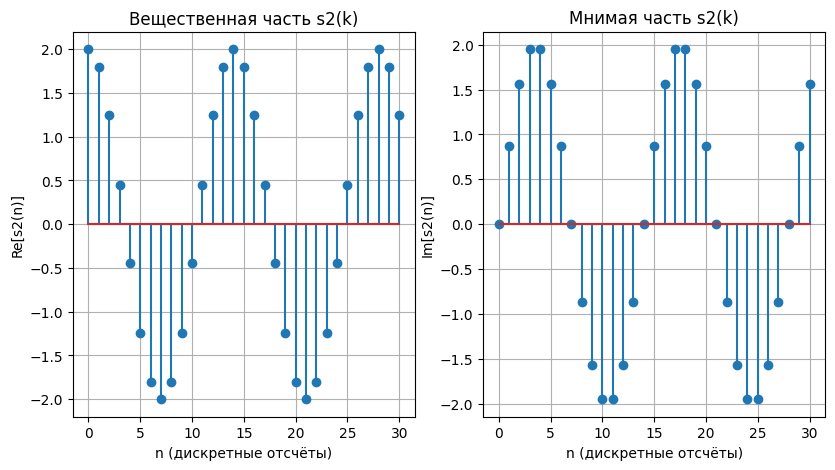

In [ ]:
# Дискретное нормированное время
n = np.arange(N)

# Дискретный комплексный гармонический сигнал
s2 = C * np.exp(1j * w0 * n)

# Выделение вещественной и мнимой частей
real_part = np.real(s2)
imag_part = np.imag(s2)

# Построение графиков
plt.figure(figsize=(15, 5))

# Вещественная часть
plt.subplot(1, 3, 1)
plt.stem(n, real_part)
plt.title("Вещественная часть s2(k)")
plt.xlabel("n (дискретные отсчёты)")
plt.ylabel("Re[s2(n)]")
plt.grid(True)

# Мнимая часть
plt.subplot(1, 3, 2)
plt.stem(n, imag_part)
plt.title("Мнимая часть s2(k)")
plt.xlabel("n (дискретные отсчёты)")
plt.ylabel("Im[s2(n)]")
plt.grid(True)

# Вывод параметров
print(f"Параметры сигнала:")
print(f"C = {C}")
print(f"ω0 = π/{7} = {w0:.3f}")
print(f"Сигнал: s2(k) = {C} * exp(j * π/2 * k)")

# Представление в виде комбинации вещественных последовательностей
print(f"\nСигнал в виде комбинации вещественных последовательностей:")
print(f"s2(k) = {C} * cos(π/2 * k) + j * {C} * sin(π/2 * k)")

## Задание 5

5. Вывести графики последовательностей $\delta_d(k)$, $\sigma_d(k)$ и $s_1(k)$, задержанных на $m$ отсчетов, на интервале времени $n \in [0, N - 1]$. Записать формулы задержанных последовательностей.

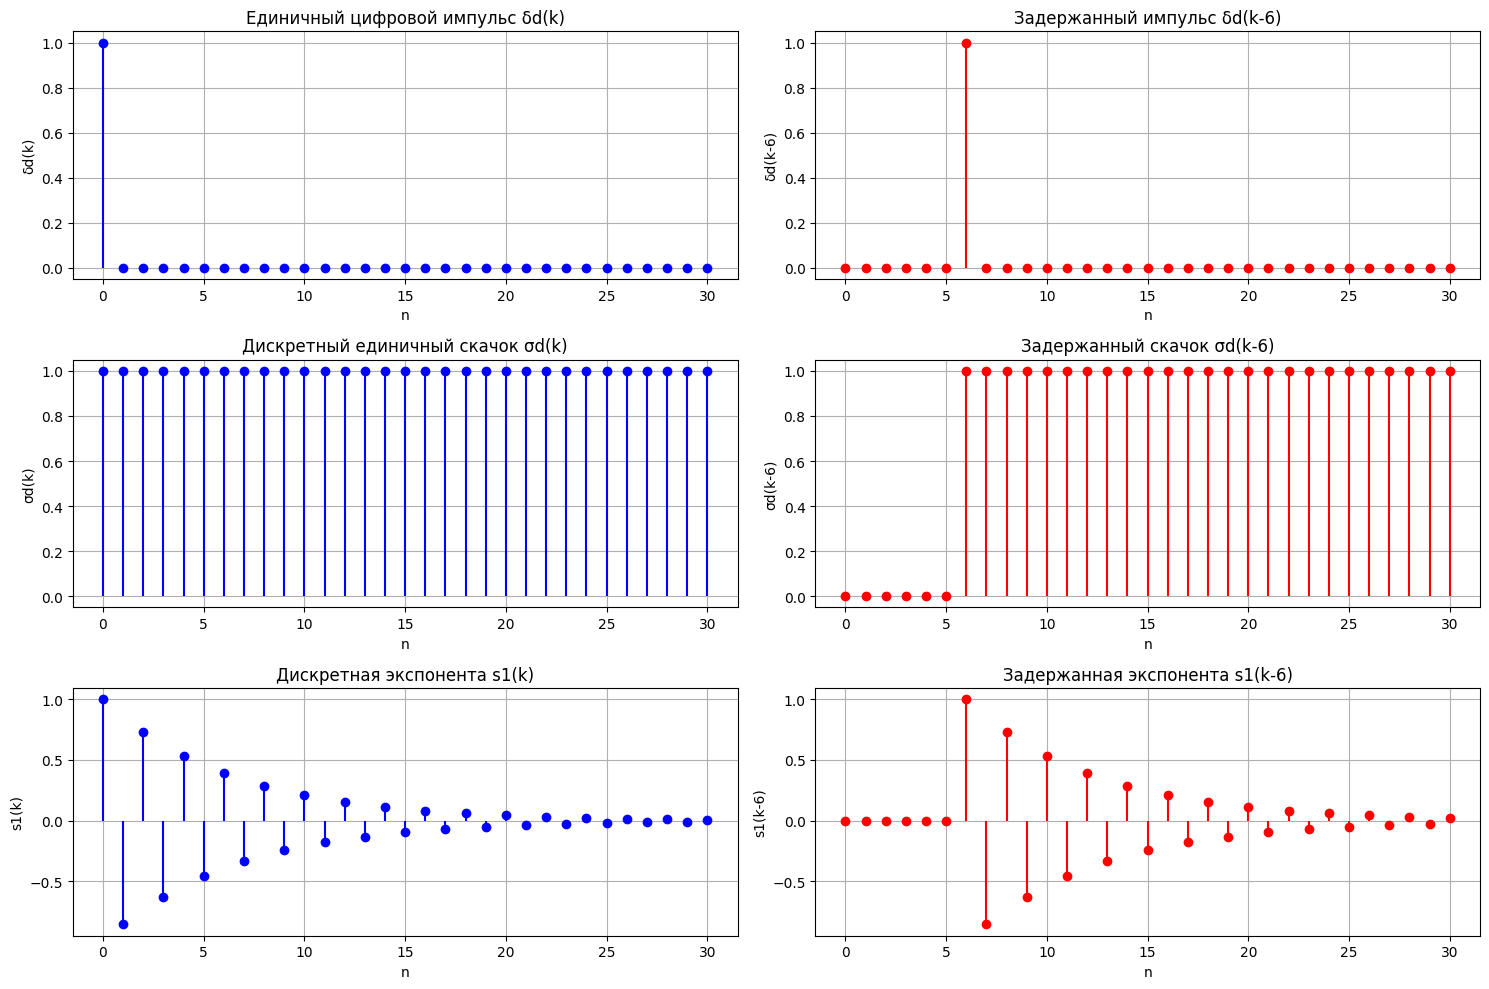

In [ ]:
# Дискретное нормированное время
n = np.arange(N)

# 1. Единичный цифровой импульс δd(k) и его задержанная версия
delta_d = np.zeros(N)
delta_d[0] = 1

delta_d_delayed = np.zeros(N)
if m < N:
    delta_d_delayed[m] = 1

# 2. Дискретный единичный скачок σd(k) и его задержанная версия
sigma_d = np.ones(N)
sigma_d_delayed = np.zeros(N)
sigma_d_delayed[m:] = 1

# 3. Дискретная экспонента s1(k) и её задержанная версия
s1 = a ** n
s1_delayed = np.zeros(N)
s1_delayed[m:] = a ** (n[m:] - m)

# Построение графиков
plt.figure(figsize=(15, 10))

# Единичный импульс
plt.subplot(3, 2, 1)
plt.stem(n, delta_d, linefmt='b-', markerfmt='bo', basefmt=' ')
plt.title("Единичный цифровой импульс δd(k)")
plt.xlabel("n")
plt.ylabel("δd(k)")
plt.grid(True)

plt.subplot(3, 2, 2)
plt.stem(n, delta_d_delayed, linefmt='r-', markerfmt='ro', basefmt=' ')
plt.title(f"Задержанный импульс δd(k-{m})")
plt.xlabel("n")
plt.ylabel(f"δd(k-{m})")
plt.grid(True)

# Единичный скачок
plt.subplot(3, 2, 3)
plt.stem(n, sigma_d, linefmt='b-', markerfmt='bo', basefmt=' ')
plt.title("Дискретный единичный скачок σd(k)")
plt.xlabel("n")
plt.ylabel("σd(k)")
plt.grid(True)

plt.subplot(3, 2, 4)
plt.stem(n, sigma_d_delayed, linefmt='r-', markerfmt='ro', basefmt=' ')
plt.title(f"Задержанный скачок σd(k-{m})")
plt.xlabel("n")
plt.ylabel(f"σd(k-{m})")
plt.grid(True)

# Экспонента
plt.subplot(3, 2, 5)
plt.stem(n, s1, linefmt='b-', markerfmt='bo', basefmt=' ')
plt.title("Дискретная экспонента s1(k)")
plt.xlabel("n")
plt.ylabel("s1(k)")
plt.grid(True)

plt.subplot(3, 2, 6)
plt.stem(n, s1_delayed, linefmt='r-', markerfmt='ro', basefmt=' ')
plt.title(f"Задержанная экспонента s1(k-{m})")
plt.xlabel("n")
plt.ylabel(f"s1(k-{m})")
plt.grid(True)

plt.tight_layout()
plt.show()

#### Формулы задержанных последовательностей

##### 1. Единичный цифровой импульс $\delta_d(k)$

Оригинальная последовательность:
$$
\delta_d(k) = \begin{cases}
1, & k = 0 \\
0, & k \neq 0
\end{cases}
$$

Задержанная на \(m\) отсчётов последовательность:
$$
\delta_d(k - m) = \begin{cases}
1, & k = m \\
0, & k \neq m
\end{cases}
$$

##### 2. Дискретный единичный скачок $\sigma_d(k)$

Оригинальная последовательность:
$$
\sigma_d(k) = \begin{cases}
1, & k \geq 0 \\
0, & k < 0
\end{cases}
$$

Задержанная на \(m\) отсчётов последовательность:
$$
\sigma_d(k - m) = \begin{cases}
1, & k \geq m \\
0, & k < m
\end{cases}
$$

##### 3. Дискретная экспоненциальная функция \(s_1(k)\)

Оригинальная последовательность:
$$
s_1(k) = a^k \cdot \sigma_d(k) = \begin{cases}
a^k, & k \geq 0 \\
0, & k < 0
\end{cases}
$$

Задержанная на \(m\) отсчётов последовательность:
$$
s_1(k - m) = a^{k-m} \cdot \sigma_d(k - m) = \begin{cases}
a^{k-m}, & k \geq m \\
0, & k < m
\end{cases}
$$

## Выводы


В ходе выполнения лабораторной работы была достигнута поставленная цель - изучено математическое описание стандартных дискретных сигналов и освоены программные средства их моделирования с использованием библиотек Python (NumPy и Matplotlib). Все задачи были успешно решены, результаты подтверждены графическими представлениями и аналитическими выводами. Были освоены фундаментальные понятия дискретной обработки сигналов, установлены соответствия между аналоговыми и дискретными представлениями, исследованы свойства базовых сигналов, составляющих основу цифровой обработки.